<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERTEMUAN 11 - PCVK**
## **OBJECT DETECTION**

Metode yang digunakan :

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [2]:
# import library yang akan dibutuhkan dalam praktikum

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

## **TEMPLATE MATCHING**

Menggunakan library openCV :

**cv.matchTemplate()**, dengan parameter :



*   **image** : citra input
*   **templ** : template yang dicari, ukurannya tidak boleh lebih besar citra input
*   **method** : metode dari template matching

Jrnis metode template matching di OpenCV :

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED





Sehingga menghasilkan luaran seperti berikut:

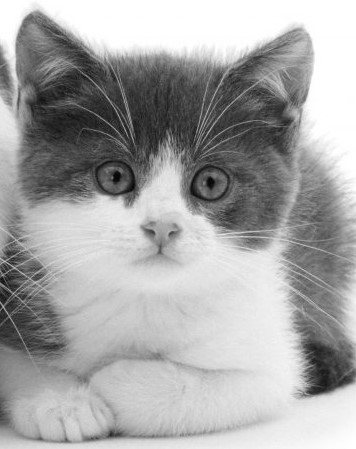

Ukuran Citra Template :  829  x  1024





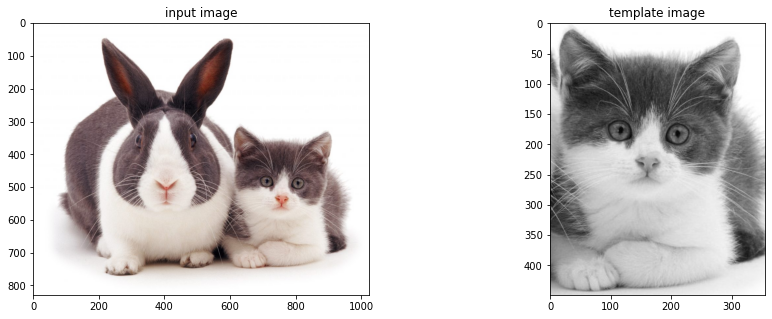

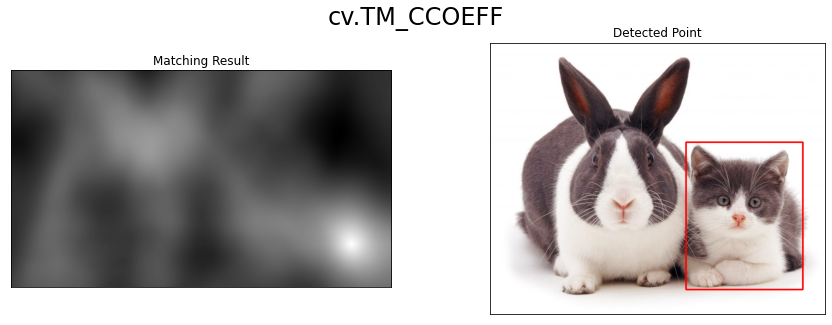

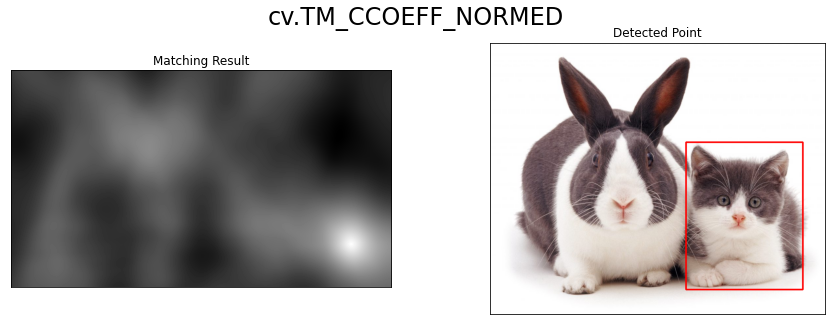

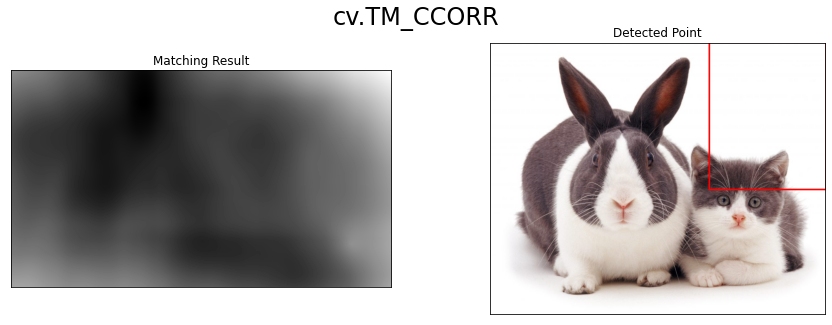

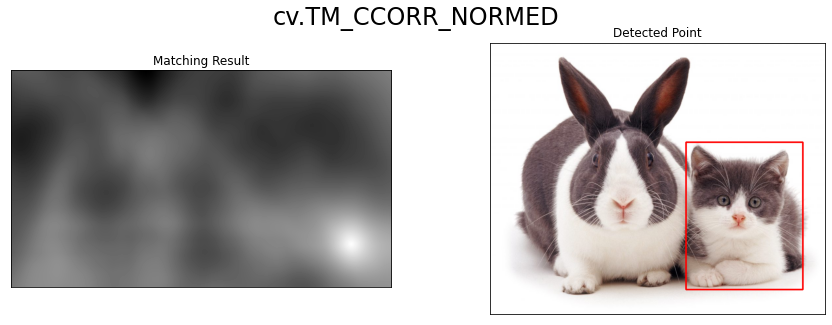

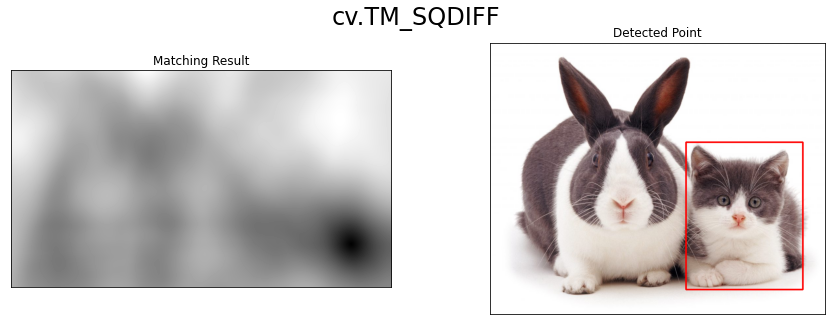

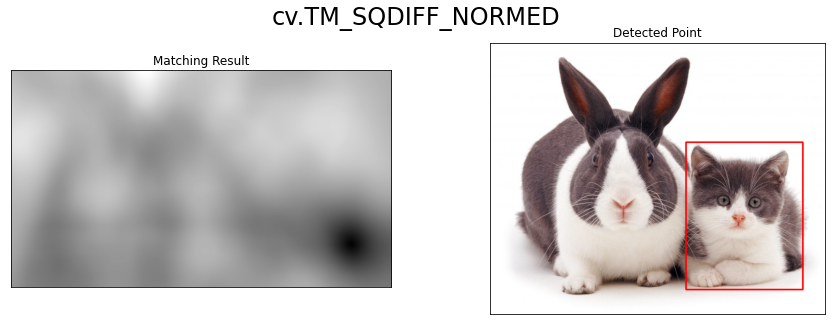

In [4]:
# load citra yang akan diinputkan
image = cv.imread('/content/drive/MyDrive/ObjectDetection/cats_and_bunnies.jpg')
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img2 = image.copy()

# load citra template
template = cv.imread('/content/drive/MyDrive/ObjectDetection/cat2_templatejpg.jpg', 0)
cv2_imshow(template)
tinggi = image.shape[0]
lebar = image.shape[1]
print("Ukuran Citra Template : ", tinggi, " x ", lebar)

# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt.subplots(1,2, figsize=(15, 5))  # membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")


# membuat array untuk menampung 6 jenis metode template matching yang disediakan oleh OpenCV
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# perulangan untuk setiap elemen yang ada di array methods
for metho in methods:
  image = img2.copy()
  method = eval(metho)

  # memanggil metode template matching
  res = cv.matchTemplate(image_gray, template, method)
  min_value, max_value, min_loc, max_loc = cv.minMaxLoc(res)

# jika method-nya TM_SQDIFF or TM_SQDIFF_NORMED, ambil nilai minimum
  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
  else:
        top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)


  cv.rectangle(image,top_left, bottom_right, (0, 0, 255), 3)
  plt.figure(figsize = (15, 5))

  plt.subplot(121), plt.imshow(res, cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  print("\n\n")
  plt.suptitle(metho, fontsize=24)

  plt.show()



Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg,
sehingga menghasilkan luaran sebagai berikut:

**A. Sobel Edge Detection**

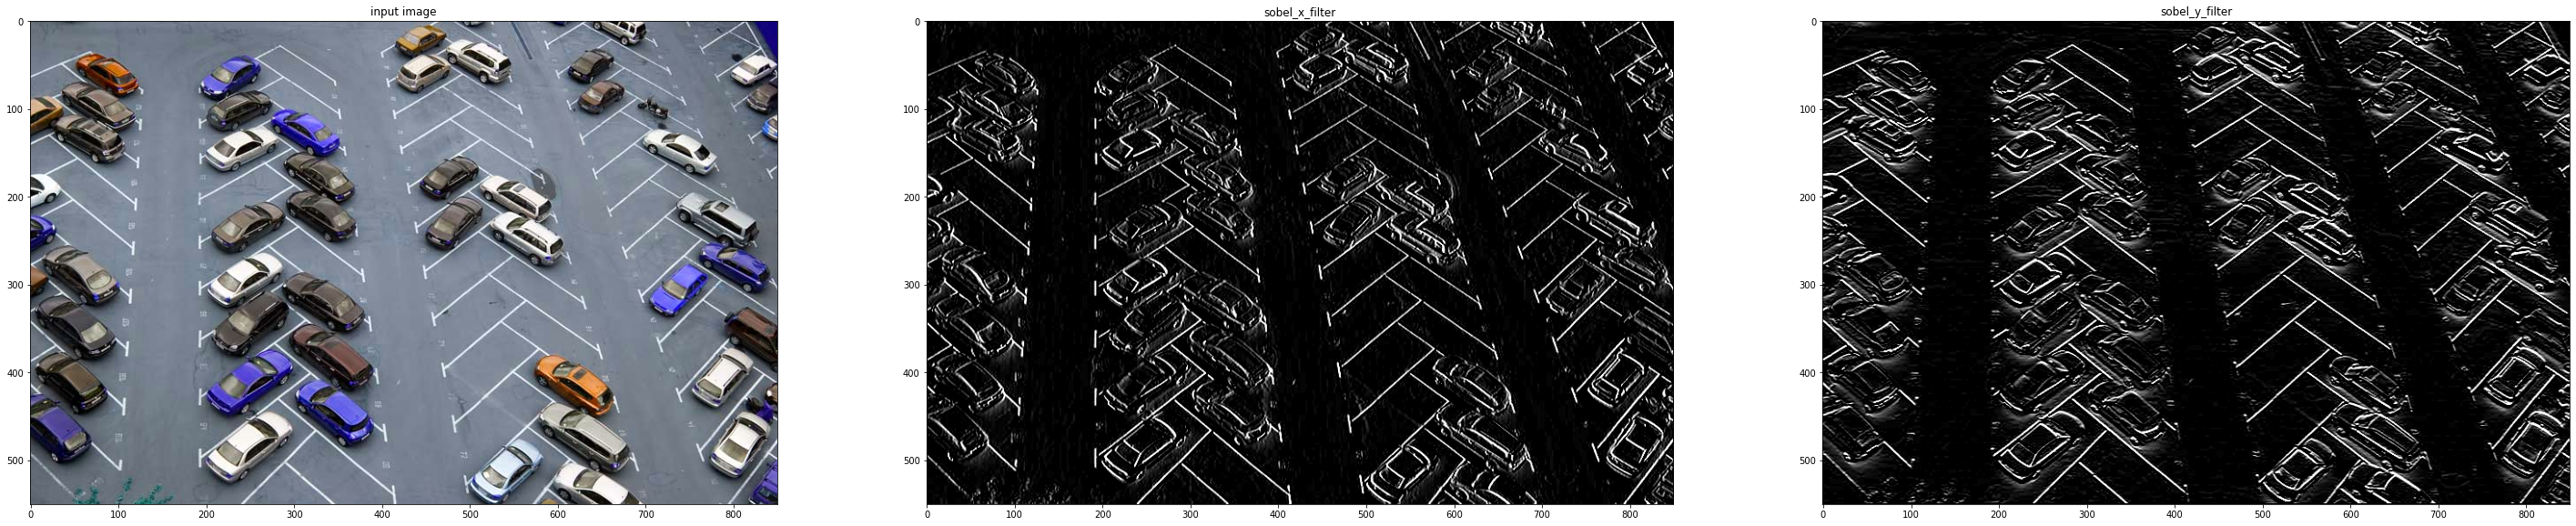

In [5]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/parking-lot-cars.jpg', cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

f, axarr = plt.subplots(1,3, figsize=(50, 25)) 
axarr[0].imshow(image), axarr[0].set_title("input image")
axarr[1].imshow(filtered_image_x, cmap='gray'), axarr[1].set_title("sobel_x_filter")
axarr[2].imshow(filtered_image_y, cmap='gray'), axarr[2].set_title("sobel_y_filter")
plt.show()